In [1]:
import numpy as np
import matplotlib.pyplot as plt

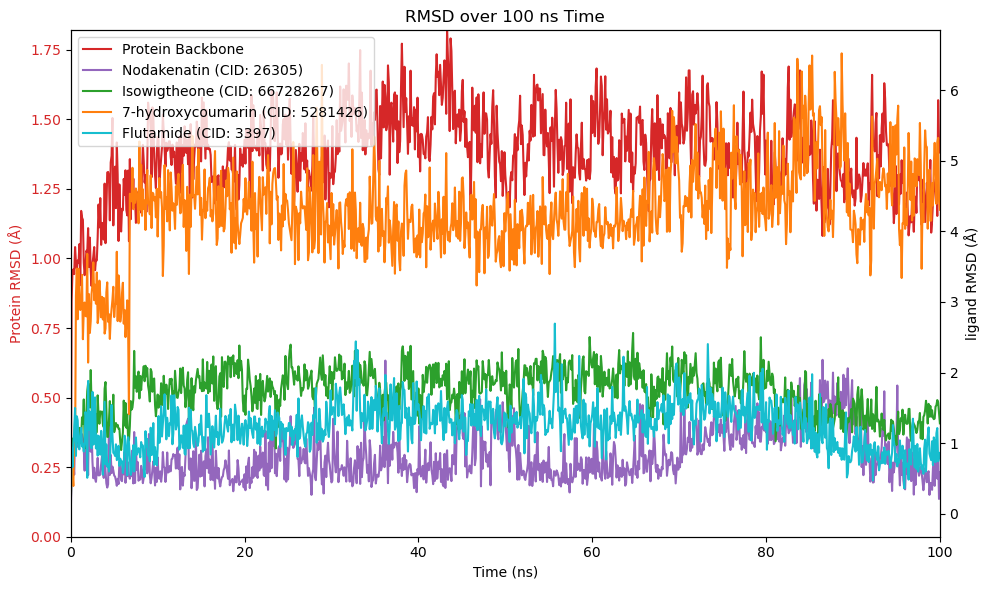

In [4]:
# Load data from files
data1 = np.loadtxt("./data/26350_PL_RMSD.dat")
data2 = np.loadtxt("./data/66728267_PL_RMSD.dat")
data3 = np.loadtxt("./data/5281426_PL_RMSD.dat")
data4 = np.loadtxt("./data/3397_PL_RMSD.dat")

# Convert frame column from ps to ns
data1[:, 0] = data1[:, 0] / 10
data2[:, 0] = data2[:, 0] / 10
data3[:, 0] = data3[:, 0] / 10
data4[:, 0] = data4[:, 0] / 10

# Extract time, Lig_wrt_Protein, and Prot_CA columns from each file
time1, prot_ca1, lig_protein1 = data1[:, 0], data1[:, 1], data1[:, 5]
time2, prot_ca2, lig_protein2 = data2[:, 0], data2[:, 1], data2[:, 5]
time3, prot_ca3, lig_protein3 = data3[:, 0], data3[:, 1], data3[:, 5]
time4, prot_ca4, lig_protein4 = data4[:, 0], data4[:, 1], data4[:, 5]

# Plot Lig_wrt_Protein vs time for each file
fig, ax1 = plt.subplots(figsize=(10, 6))
plt.margins(0, 0)

# protein rmsd in left y axis
ax1.set_xlabel('Time (ns)')
ax1.set_ylabel('Protein RMSD (Å)', color="tab:red")
# ax1.plot(time1, prot_ca1, label="Protein Backbone", color="tab:red")
# ax1.plot(time2, prot_ca2, label="Protein Backbone", color="tab:red")
# ax1.plot(time3, prot_ca3, label="Protein Backbone", color="tab:red")
ax1.plot(time4, prot_ca4, label="Protein Backbone", color="tab:red")

ax1.tick_params(axis='y', labelcolor="tab:red")
ax1.set_title("RMSD over 100 ns Time")

ax2 = ax1.twinx()

color1 = 'tab:purple'
color2 = 'tab:green'
color3 = 'tab:orange'
color4 = 'tab:cyan'

# ligand rmsd in right y axis
ax2.set_ylabel('ligand RMSD (Å)')  # we already handled the x-label with ax1
ax2.plot(time1, lig_protein1, label="Nodakenatin (CID: 26305)", color=color1)
ax2.plot(time2, lig_protein2, label="Isowigtheone (CID: 66728267)", color=color2)
ax2.plot(time3, lig_protein3, label="7-hydroxycoumarin (CID: 5281426)", color=color3)
ax2.plot(time4, lig_protein4, label="Flutamide (CID: 3397)", color=color4)

# Set y-axis limit for the right axis
# ax2.set_ylim([0, 3])

ax2.tick_params(axis='y')

# Align the legend for the right y-axis labels in flex
fig.tight_layout()  # otherwise the right y-label is slightly clipped
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles1 + handles2
labels = labels1 + labels2
# ax2.legend(handles, labels, loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)
ax2.legend(handles, labels, loc="upper left")
plt.savefig('RMSD-all.png', dpi=300, bbox_inches='tight')
plt.show()
